# Word Count Prototype
This notebook presents a prototype of our word count experiment example. It calls our `cdstemplate` library directly, to avoid reduplicating code, then creates a plot of the most frequent words in the corpus. Notebooks are a great way to create visualizations, which often need to be tweaked for readability and aesthetics. 

Don't forget to restart your kernel and re-run the notebook completely before you commit or share it with others! This helps avoid problems arising from deleted or reordered cells.

In [1]:
# This cell imports packages and defines any experimental set-up
# Try to make experimental parameters easy for others to to find by including them in a few cells at the beginning of your notebook
import logging
from pathlib import Path

import matplotlib.pyplot as plt
import seaborn as sns

from cdstemplate import word_count

# You can include this to see log messages from the packages you're using
logging.basicConfig(level=logging.INFO)

# A relative path to the input data
input_txt_dir = "../data/gutenberg"

In [2]:
# Add counts for each document
corpus_counter = word_count.CorpusCounter()
for txt_file in Path(input_txt_dir).glob("*.txt"):
    print("Tokenizing file:", txt_file)
    txt_contents = txt_file.read_text()
    corpus_counter.add_doc(txt_contents)

INFO:cdstemplate.word_count:Adding 258 token(s) case insensitively
INFO:cdstemplate.word_count:Vocabulary size increased by 113 word types
INFO:cdstemplate.word_count:Adding 192 token(s) case insensitively
INFO:cdstemplate.word_count:Vocabulary size increased by 111 word types
INFO:cdstemplate.word_count:Adding 204 token(s) case insensitively
INFO:cdstemplate.word_count:Vocabulary size increased by 69 word types
INFO:cdstemplate.word_count:Adding 181 token(s) case insensitively
INFO:cdstemplate.word_count:Vocabulary size increased by 97 word types
INFO:cdstemplate.word_count:Adding 197 token(s) case insensitively
INFO:cdstemplate.word_count:Vocabulary size increased by 103 word types
INFO:cdstemplate.word_count:Adding 189 token(s) case insensitively
INFO:cdstemplate.word_count:Vocabulary size increased by 88 word types
INFO:cdstemplate.word_count:Adding 189 token(s) case insensitively
INFO:cdstemplate.word_count:Vocabulary size increased by 79 word types
INFO:cdstemplate.word_count:Add

Tokenizing file: ../data/gutenberg/blake-poems.txt
Tokenizing file: ../data/gutenberg/carroll-alice.txt
Tokenizing file: ../data/gutenberg/bible-kjv.txt
Tokenizing file: ../data/gutenberg/austen-persuasion.txt
Tokenizing file: ../data/gutenberg/chesterton-thursday.txt
Tokenizing file: ../data/gutenberg/burgess-busterbrown.txt
Tokenizing file: ../data/gutenberg/chesterton-ball.txt
Tokenizing file: ../data/gutenberg/austen-emma.txt
Tokenizing file: ../data/gutenberg/chesterton-brown.txt
Tokenizing file: ../data/gutenberg/austen-sense.txt
Tokenizing file: ../data/gutenberg/bryant-stories.txt


In [3]:
# How many unique words appeared in our corpus?
print("Vocab size:", corpus_counter.get_vocab_size())

Vocab size: 949


In [4]:
# Get the dataframe we'll work with for the display
word_count_df = corpus_counter.get_token_counts_as_dataframe()
display(word_count_df.head())

,token,count
52,"""Drop",1
361,"""ELLIOT",1
571,"""I",1
930,"""It's",2
938,"""No,",1


In [5]:
# We only want to include to top 100 most frequent words in our plot
top_words_df = word_count_df.sort_values("count", ascending=False).head(100)
display(top_words_df)

,token,count
18,the,127
13,of,72
10,and,62
25,a,43
34,to,38
...,...,...
576,one,3
154,what,3
184,when,3
275,firmament,3


Text(0.5, 1.0, 'Top 100 Most Frequent Words in a Subset of Project Gutenberg Texts')

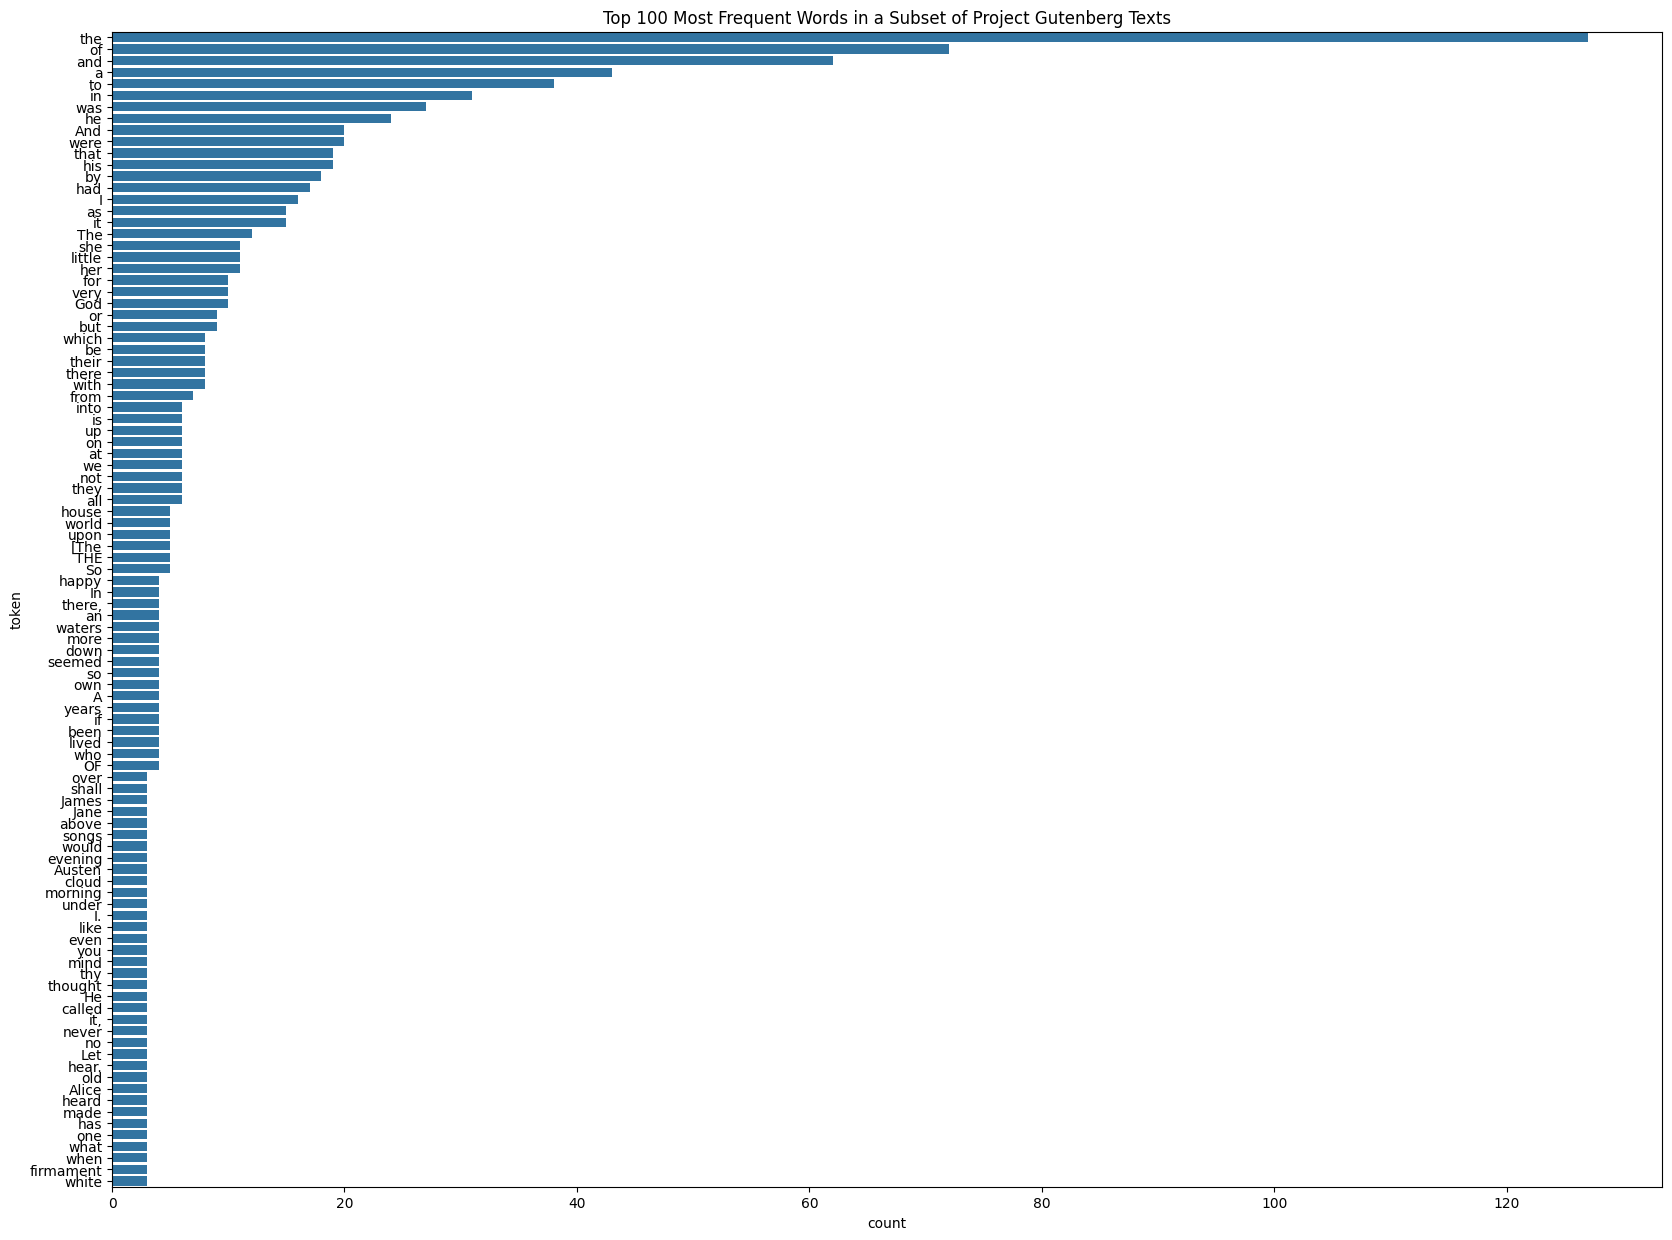

In [6]:
# Make the plot and customize how it is displayed
plt.figure(figsize=(20, 15))
fig = sns.barplot(data=top_words_df, x="count", y="token")
fig.set_title("Top 100 Most Frequent Words in a Subset of Project Gutenberg Texts")